# Day 2 : Scaling and normalization

This tutorial shows how to scale and normalize data (and what the difference is between the two). Tutorial based on https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data

## 1) Get our environment set up

In [5]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("Dataset/Day2_dataset/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

### Scaling vs. Normalization: What's the difference?
The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data. Let's talk a little more in-depth about each of these options.

- #### Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

    By scaling your variables, you can help compare different variables on equal footing. Let's see the example

Text(0.5, 1.0, 'Scaled data')

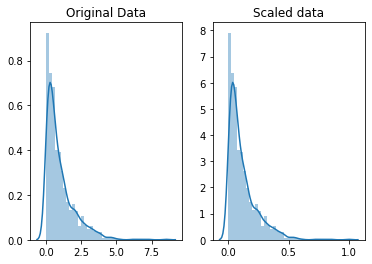

In [6]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

    Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

- #### Normalization